In [1]:
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

# Preprocessing a Whole Slide Image

In this section, we will walk you through a general workflow on how to process WSI using LazySlide.

## `wsiata`
In LazySlide, we mainly work with `wsidata`, which is a data container for:
1. An WSI reader
2. A `SpatialData` object

You don't need to understand the `wsidata` for this tutorial. If you are interested, you can refer to the [Using WSIData]() for details.

## import

The convention namespace for lazyslide is always `zs`.

In [2]:
from wsidata import open_wsi
import lazyslide as zs

## Open a WSI

You can load a WSI either from **local** file or **remote URL** (http, ssh, s3, gcp), here we load a Esophagus slide from GTEx.

In [3]:
wsi = open_wsi("https://brd.nci.nih.gov/brd/imagedownload/GTEX-1117F-1626")

## What's in the wsi?

In [4]:
wsi

WSI: GTEX-1117F-1626
Reader: openslide
SpatialData object, with associated Zarr store: /Users/yzheng/Projects/LazySlide/docs/source/tutorial/GTEX-1117F-1626.zarr
├── Images
│     └── 'wsi_thumbnail': DataArray[cyx] (3, 1439, 1696)
├── Shapes
│     ├── 'tiles': GeoDataFrame shape: (17258, 8) (2D shapes)
│     └── 'tissues': GeoDataFrame shape: (6, 2) (2D shapes)
└── Tables
      ├── 'resnet50_tiles': AnnData (17258, 1000)
      ├── 'slide_properties': AnnData (0, 0)
      └── 'tile_spec': AnnData (0, 0)
with coordinate systems:
    ▸ 'global', with elements:
        wsi_thumbnail (Images), tiles (Shapes), tissues (Shapes)

Let's check the slide metadata, this is a slide scan at 20X (magnification) with a mpp (micro per pixel) of 0.4942, it's shape is 40553 * 47807

In [5]:
wsi.properties

Field,Value
shape,"[40553, 47807]"
n_level,3
level_shape,"[[40553, 47807], [10138, 11951], [2534, 2987]]"
level_downsample,"[1.0, 4.0001748319017985, 16.004286728943022]"
mpp,0.4942
magnification,20.0
bounds,"[0, 0, 40553, 47807]"


We can first take a quick look at slide, what does it look like.

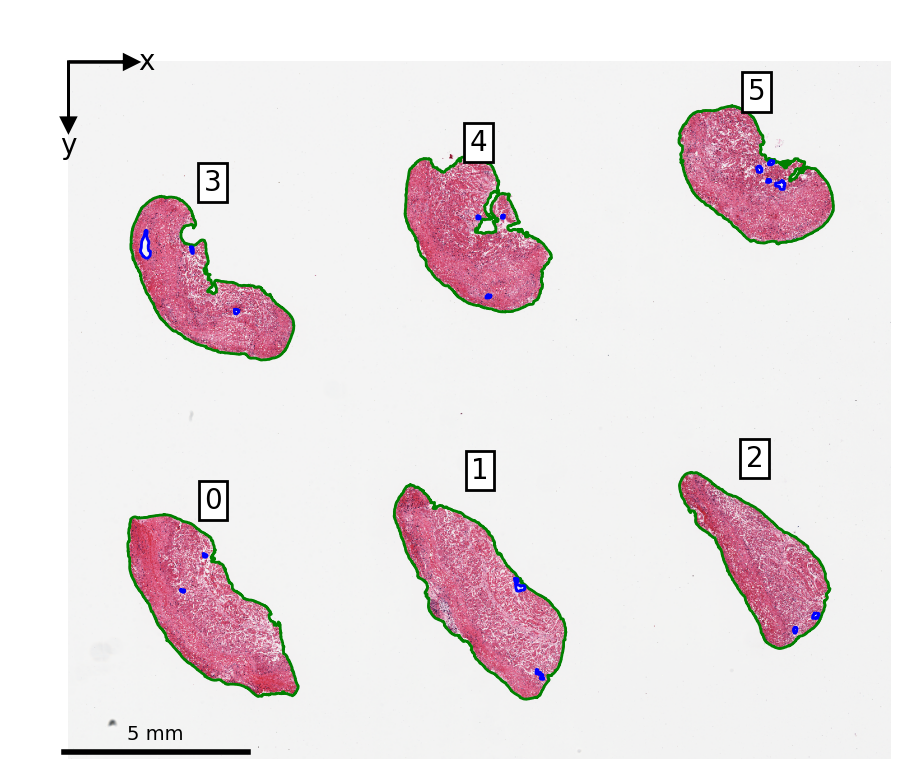

In [6]:
zs.pl.tissue(wsi)

## Tissue Segmentation

Before we proceed to other analysis, we need to segment the tissue from the slide.

We can take a quick look of the segmentation result, the <span style="color: green;">greens</span> are the tissue borders, the <span style="color: blue;">blues</span> are the holes that will be excluded.

The default parameters ususally works pretty well, but you may go ahead to adjust some parameters to fit your need.

In [7]:
zs.pp.find_tissue(wsi)
wsi

/Users/yzheng/miniforge3/envs/lazyslide/lib/python3.11/site-packages/spatialdata/_core/_elements.py:96: UserWarning: Key `tissues` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


WSI: GTEX-1117F-1626
Reader: openslide
SpatialData object, with associated Zarr store: /Users/yzheng/Projects/LazySlide/docs/source/tutorial/GTEX-1117F-1626.zarr
├── Images
│     └── 'wsi_thumbnail': DataArray[cyx] (3, 1439, 1696)
├── Shapes
│     ├── 'tiles': GeoDataFrame shape: (17258, 8) (2D shapes)
│     └── 'tissues': GeoDataFrame shape: (6, 2) (2D shapes)
└── Tables
      ├── 'resnet50_tiles': AnnData (17258, 1000)
      ├── 'slide_properties': AnnData (0, 0)
      └── 'tile_spec': AnnData (0, 0)
with coordinate systems:
    ▸ 'global', with elements:
        wsi_thumbnail (Images), tiles (Shapes), tissues (Shapes)

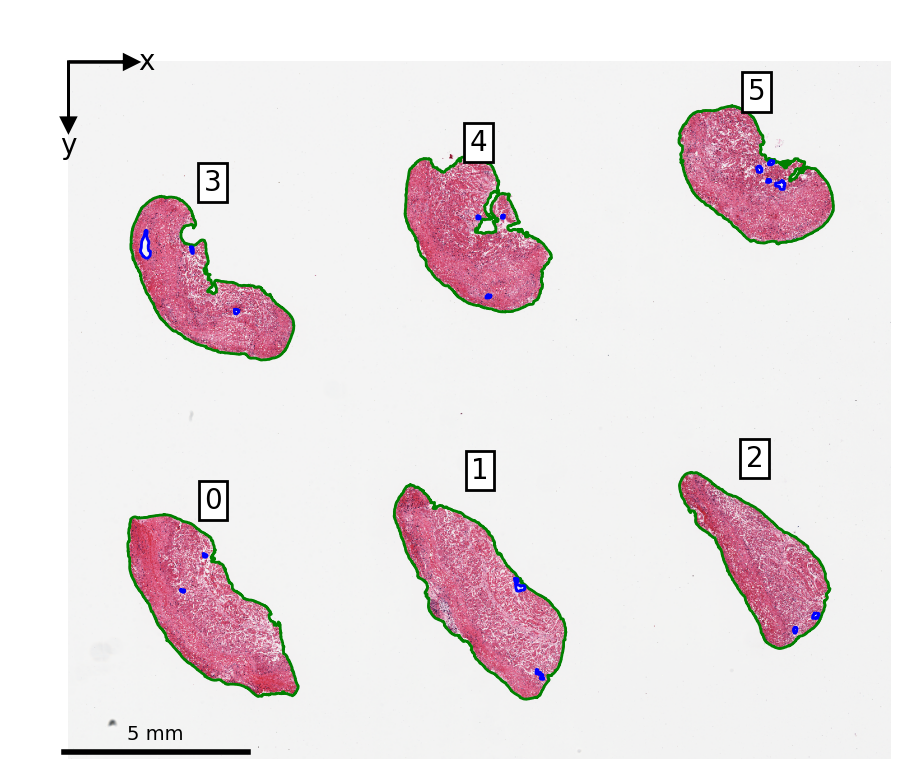

In [8]:
zs.pl.tissue(wsi)

We can also take a detail look on a specific tissue instance.

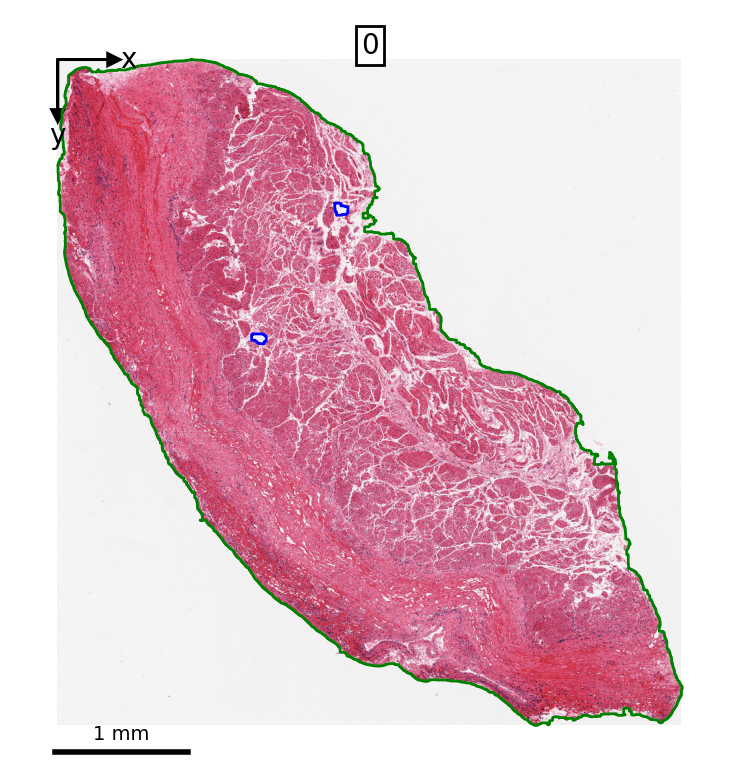

In [9]:
zs.pl.tissue(wsi, tissue_id=0)

## Tissue QC

In [ ]:
zs.tl.tissue_qc(wsi, scores=["brightness", "redness"])

## Tissue properties

You can quickly get the geometry properties of each tissue instances.

In [16]:
zs.tl.tissue_props(wsi)

/Users/yzheng/miniforge3/envs/lazyslide/lib/python3.11/site-packages/spatialdata/_core/_elements.py:96: UserWarning: Key `tissues` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


In [17]:
wsi['tissues']

,tissue_id,geometry,area,area_filled,convex_area,solidity,convexity,axis_major_length,axis_minor_length,eccentricity,...,moment-mu21,moment-mu12,moment-mu03,moment-nu20,moment-nu11,moment-nu02,moment-nu30,moment-nu21,moment-nu12,moment-nu03
0,0,"POLYGON ((5568.243 26317.15, 5564.243 26321.15...",55804000.0,55863656.0,60350632.0,0.924663,1.081475,13480.404297,5470.207520,0.913967,...,9.534570e+16,-1.826760e+15,-1.276978e+17,0.103700,0.083808,0.132444,0.005766,0.004088,-0.000078,-0.005475
1,1,"POLYGON ((19872.869 24585.075, 19868.868 24589...",58963062.0,59237078.0,63240766.0,0.932358,1.072549,14486.612305,5404.440430,0.927805,...,-1.119565e+17,-1.614650e+17,-1.184795e+17,0.102313,0.090507,0.145438,-0.000439,-0.004145,-0.005979,-0.004387
2,2,"POLYGON ((36197.582 23869.043, 36193.582 23873...",40264696.0,40404336.0,43102872.0,0.934153,1.070488,12345.796875,4844.747559,0.919786,...,-1.703416e+17,-1.629567e+17,-2.949120e+16,0.105302,0.089498,0.149041,-0.009258,-0.016415,-0.015704,-0.002842
3,3,"POLYGON ((5368.235 7816.342, 5364.234 7820.342...",43992304.0,44629856.0,52565504.0,0.836904,1.194880,12106.467773,5519.851562,0.890009,...,7.757912e+16,-9.558421e+16,-2.659903e+17,0.132972,0.091120,0.129267,0.017359,0.005830,-0.007183,-0.019990
4,4,"POLYGON ((23385.022 5512.241, 23381.022 5516.2...",48931700.0,49033644.0,54142566.0,0.903757,1.106493,10679.300781,6002.856445,0.827068,...,2.599067e+16,9.545047e+15,-5.849659e+16,0.084539,0.044100,0.108506,0.002115,0.001544,0.000567,-0.003475
5,5,"POLYGON ((38569.686 2560.112, 38565.686 2564.1...",43636184.0,43977432.0,48057432.0,0.908001,1.101321,10596.025391,5520.321289,0.853569,...,1.466368e+16,-4.317692e+16,-6.819893e+16,0.113665,0.053494,0.088085,0.007875,0.001143,-0.003366,-0.005317


## Tiling

The slide images are usually too large to fit into memory, a widly adopted strategy is to create smaller tiles or patches.

```{note}
If you are working with many slides from different sources. Harmonization is very important to account for batch effects. In tiling steps, if your slides have different magnification, you should specify a mpp value that the tiling should works on.

Here is a list of mpp value map with magnification:

- 20X: mpp=0.5
- 40X: mpp=0.25

```

In [18]:
zs.pp.tiles(wsi, 256, mpp=0.5)
wsi

/Users/yzheng/miniforge3/envs/lazyslide/lib/python3.11/site-packages/spatialdata/_core/_elements.py:96: UserWarning: Key `tiles` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/Users/yzheng/miniforge3/envs/lazyslide/lib/python3.11/site-packages/spatialdata/_core/_elements.py:116: UserWarning: Key `tile_spec` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


WSI: GTEX-1117F-1626
Reader: openslide
SpatialData object, with associated Zarr store: /Users/yzheng/Projects/LazySlide/docs/source/tutorial/GTEX-1117F-1626.zarr
├── Images
│     └── 'wsi_thumbnail': DataArray[cyx] (3, 1439, 1696)
├── Shapes
│     ├── 'tiles': GeoDataFrame shape: (17258, 5) (2D shapes)
│     └── 'tissues': GeoDataFrame shape: (6, 51) (2D shapes)
└── Tables
      ├── 'resnet50_tiles': AnnData (17258, 1000)
      ├── 'slide_properties': AnnData (0, 0)
      └── 'tile_spec': AnnData (0, 0)
with coordinate systems:
    ▸ 'global', with elements:
        wsi_thumbnail (Images), tiles (Shapes), tissues (Shapes)

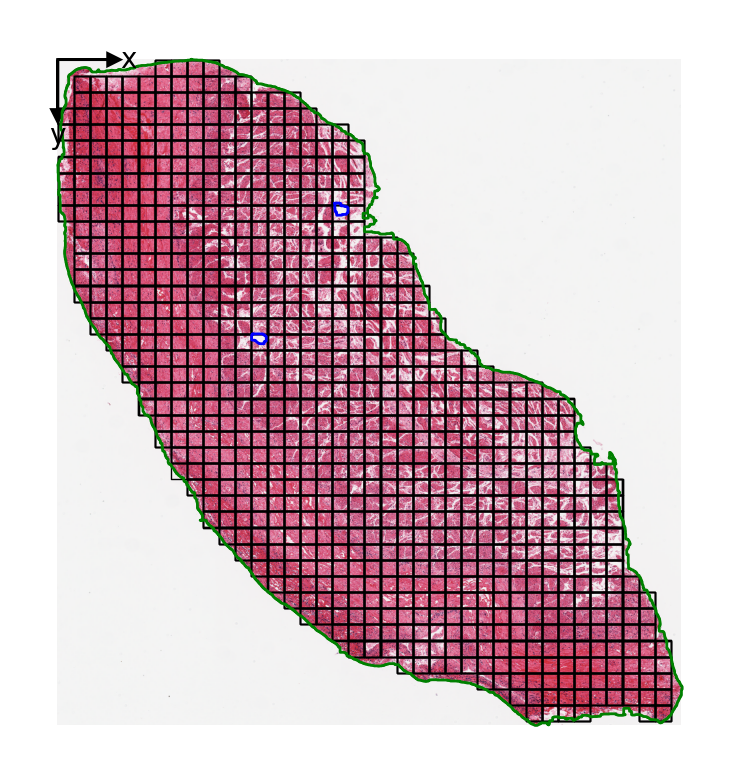

In [22]:
zs.pl.tiles(wsi, tissue_id=0, show_grid=True, show_point=False)

In [15]:
zs.pp.tiles_qc(wsi, scorers=["contrast", "focus"], num_workers=4)

Output()

/Users/yzheng/miniforge3/envs/lazyslide/lib/python3.11/site-packages/spatialdata/_core/_elements.py:96: UserWarning: Key `tiles` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


In [16]:
wsi['tiles']

,id,x,y,tissue_id,geometry,contrast,focus,qc
0,0,3448,27085,0,"POLYGON ((3448 27085, 3448 27341, 3704 27341, ...",0.835294,0.000000,True
1,1,3450,27085,0,"POLYGON ((3450 27085, 3450 27341, 3706 27341, ...",0.835294,0.000000,True
2,2,3450,27087,0,"POLYGON ((3450 27087, 3450 27343, 3706 27343, ...",0.835294,0.000000,True
3,3,3448,27087,0,"POLYGON ((3448 27087, 3448 27343, 3704 27343, ...",0.835294,0.000000,True
4,4,3448,27341,0,"POLYGON ((3448 27341, 3448 27597, 3704 27597, ...",0.823529,0.262961,True
...,...,...,...,...,...,...,...,...
17253,17253,44189,8194,5,"POLYGON ((44189 8194, 44189 8450, 44445 8450, ...",0.854902,0.000000,True
17254,17254,44189,8448,5,"POLYGON ((44189 8448, 44189 8704, 44445 8704, ...",0.803922,0.000000,True
17255,17255,44191,8448,5,"POLYGON ((44191 8448, 44191 8704, 44447 8704, ...",0.803922,0.000000,True
17256,17256,44191,8450,5,"POLYGON ((44191 8450, 44191 8706, 44447 8706, ...",0.803922,0.000000,True


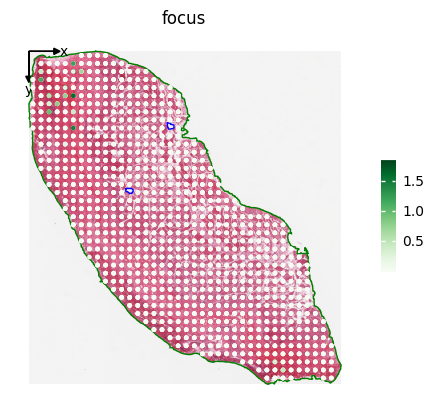

In [18]:
zs.pl.tiles(wsi, tissue_id=0, color='focus', cmap="Greens")

## Feature extraction

Feature extraction is to transform the image into a the numeric representation, which comprises of different morphological features. 

Typically, this is done by feeding the tiles into a vision model.

In [19]:
zs.tl.feature_extraction(wsi, 'resnet50', device="mps")

Output()

### Feature aggregation

To perform analysis across dataset, we need to create slide-level or tissue-level features.

In [30]:
zs.tl.agg_features(wsi, 'resnet50', by="slide")
zs.tl.agg_features(wsi, 'resnet50', by="tissue")

In [31]:
wsi['resnet50_tiles']

AnnData object with n_obs × n_vars = 17258 × 1000
    obs: 'tile_id', 'library_id'
    uns: 'spatialdata_attrs'
    varm: 'agg_slide', 'agg_tissue'

In [32]:
wsi.get.features_anndata('resnet50')

AnnData object with n_obs × n_vars = 17258 × 1000
    obs: 'id', 'x', 'y', 'tissue_id'
    uns: 'tile_spec', 'slide_properties'
    obsm: 'spatial'
    varm: 'agg_slide', 'agg_tissue'

## Save on the disk

In [22]:
wsi.save()

Notice that after saving, your `SpatialData` is now associated with a disk storage.

In [23]:
wsi

WSI: GTEX-1117F-1626
Reader: openslide
SpatialData object, with associated Zarr store: /Users/yzheng/Projects/LazySlide/docs/source/tutorial/GTEX-1117F-1626.zarr
├── Images
│     └── 'wsi_thumbnail': DataArray[cyx] (3, 1439, 1696)
├── Shapes
│     ├── 'tiles': GeoDataFrame shape: (17258, 8) (2D shapes)
│     └── 'tissues': GeoDataFrame shape: (6, 2) (2D shapes)
└── Tables
      ├── 'resnet50_tiles': AnnData (17258, 1000)
      ├── 'slide_properties': AnnData (0, 0)
      └── 'tile_spec': AnnData (0, 0)
with coordinate systems:
    ▸ 'global', with elements:
        wsi_thumbnail (Images), tiles (Shapes), tissues (Shapes)